# BigMart Data Analysis and Prediction

The data scientists at BigMart have collected 2013 sales data for 1559 products across 10 stores in different cities. Also, certain attributes of each product and store have been defined. The aim of this data science project is to build a predictive model and find out the sales of each product at a particular store.
Using this model, BigMart will try to understand the properties of products and stores which play a key role in increasing sales.
The data has missing values as some stores do not report all the data due to technical glitches. Hence, it will be required to treat them accordingly.

## Hypothesis Generation

### Item Features

Item features play a vital role in the number of sales of the item. The higher the quality and the more attractive the item is, the more sales it generates.

- **Item_Identifier**: Some items may do exceptionally well with sales due to marketing reasons or other features that are not recoded here. Some items may perform much better in selected outlets.
- **Item_Weight**: The heavier the item, the more cheaper it becomes by unit mass. Thus it generates more sales.
- **Item_Fat_Content**: More fat means a tastier product and this can lead to higher sales. The majority prefer a tastier product rather than a healthier product (This may change according to the <ins>*outlet location*</ins>. High tier locations have educated people who prefer healthier products)
- **Item_Visibility**: There is a positive correlation between visibility and sales. Some <ins>*item types*</ins> may be more visible than others.
- **Item_Type**: Some types are must have staples at homes, so they generate more sales. Also, some types are going to have a higher <ins>*MRP*</ins>
- **Item_MRP**: The cheaper the item, the more sale it generates. But some <ins>*types*</ins> generate more sales, when they are more expensive like "household" and "health and hygiene", because it implies a product has better quality. Plus, an item with high <ins>*visibility*</ins> (has a special shelf or is being advertised) and high price may generate high sales.

### Outlet Features

Outlets have different strategies to generate more sales for its items and each outlet has customers with different buying habits.

- **Outlet_Identifier**: Some outlets may do exceptionally well with sales due to marketing reasons or other features that are not recorded here.
- **Outlet_Establishment_year**: Older outlets may have better reputation with customers, so they generate higher sales. New outlets may perform better in high <ins>*tier locations*</ins>.
- **Outlet_Size**: The <ins>*visibility*</ins> of products may decrease in bigger outlets, geenrating less sales for each product.
- **Outlet_Locations_Type**: The location may generate higher sales for some <ins>*item types*</ins> and may have higher prices (<ins>*MRP*</ins>).
- **Outlet_Type**: Each type may include high <ins>*item types*</ins> than other outlets.

## Package and Data Loading

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
df = pd.read_csv("./Train.csv")
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


## EDA

Columns have the correct data types

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 566.0+ KB


### Data cleaning

#### Make all column names lowercase

In [5]:
df.columns = df.columns.str.lower()
df.columns

Index(['item_identifier', 'item_weight', 'item_fat_content', 'item_visibility',
       'item_type', 'item_mrp', 'outlet_identifier',
       'outlet_establishment_year', 'outlet_size', 'outlet_location_type',
       'outlet_type', 'item_outlet_sales'],
      dtype='object')

#### Fat content has no naming convention

In [14]:
df["item_fat_content"].unique()

array(['Low Fat', 'Regular', 'low fat', 'LF', 'reg'], dtype=object)

In [15]:
df["item_fat_content"] = df["item_fat_content"].replace({"low fat": "Low Fat", "LF": "Low Fat", "reg": "Regular"})
df["item_fat_content"].unique()

array(['Low Fat', 'Regular'], dtype=object)

#### Handling Outliers

<AxesSubplot:>

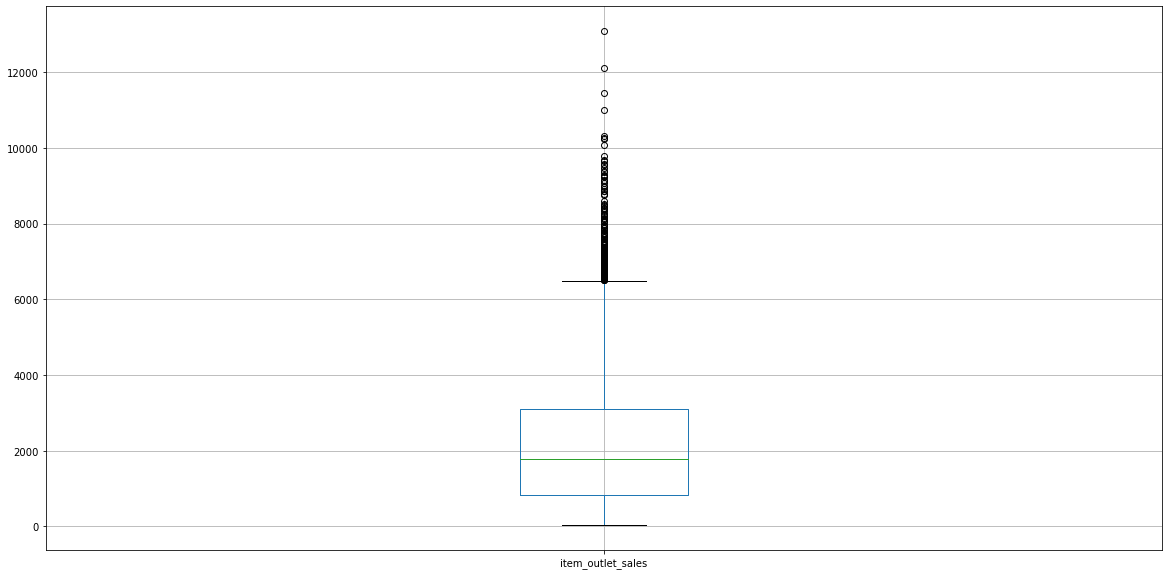

In [35]:
plt.figure(figsize=(20,10))
df.boxplot(column="item_outlet_sales")

<AxesSubplot:>

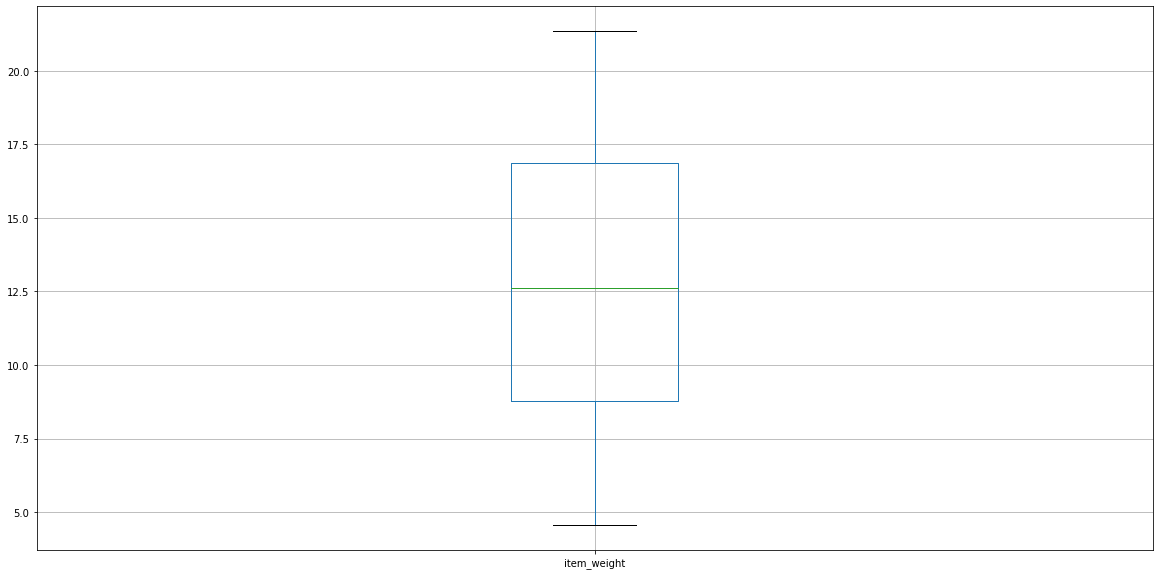

In [36]:
plt.figure(figsize=(20,10))
df.boxplot(column="item_weight")

Visibility large numbers are not considered outliers as they are logical numbers. A product to have *0.30*% visibility is normal

<AxesSubplot:>

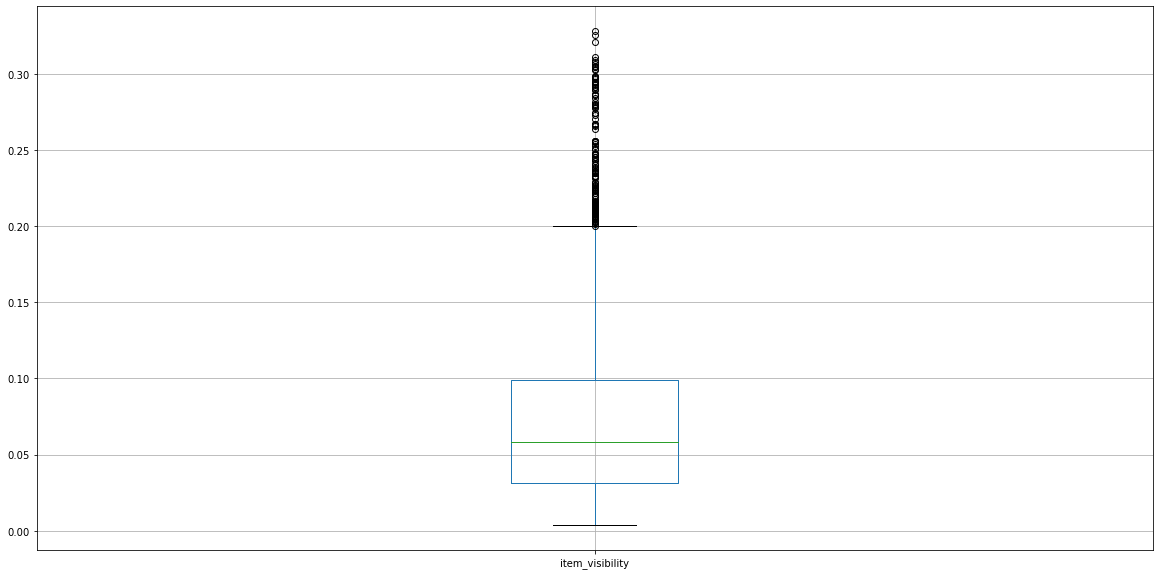

In [37]:
plt.figure(figsize=(20,10))
df.boxplot(column="item_visibility")

<AxesSubplot:>

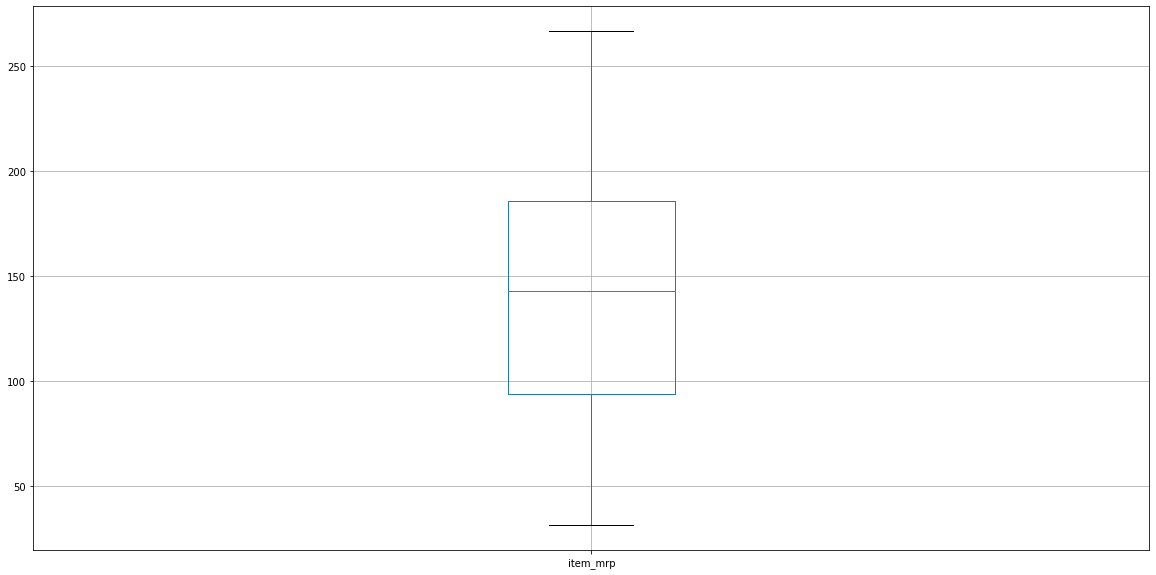

In [38]:
plt.figure(figsize=(20,10))
df.boxplot(column="item_mrp")

### Data Content

In [6]:
df["item_identifier"].unique().shape

(1559,)

In [7]:
df["outlet_identifier"].unique().shape

(10,)

- Item weights range from *4.5* kg to *21* kg
- *Some items are not visible (visibility = 0)* ??
- The most visible item allocates *33%* of the whole store

In [8]:
df.describe()

,item_weight,item_visibility,item_mrp,outlet_establishment_year,item_outlet_sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


#### Outlets

In [9]:
df.groupby("outlet_identifier")["outlet_establishment_year"].unique().sort_values()

outlet_identifier
OUT019    [1985]
OUT027    [1985]
OUT013    [1987]
OUT046    [1997]
OUT010    [1998]
OUT049    [1999]
OUT045    [2002]
OUT035    [2004]
OUT017    [2007]
OUT018    [2009]
Name: outlet_establishment_year, dtype: object

All outlets have nearly 900 items except for two outlets *OUT010* & *OUT019*

<AxesSubplot:xlabel='outlet_identifier', ylabel='Count'>

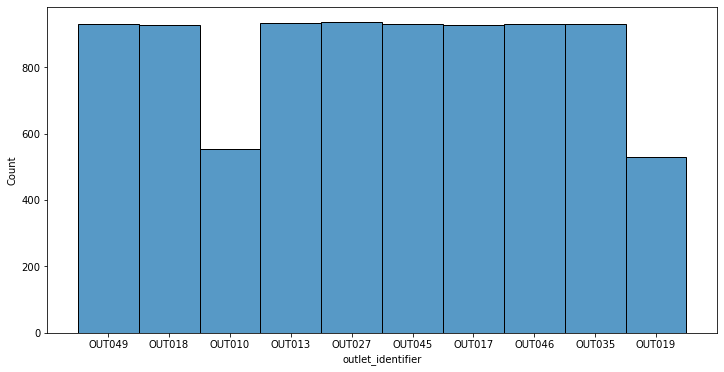

In [10]:
plt.figure(figsize=(12,6))
sns.histplot(df["outlet_identifier"])

In [11]:
df["outlet_size"].unique()

array(['Medium', nan, 'High', 'Small'], dtype=object)

In [12]:
df["outlet_location_type"].unique()

array(['Tier 1', 'Tier 3', 'Tier 2'], dtype=object)

In [13]:
df["outlet_type"].unique()

array(['Supermarket Type1', 'Supermarket Type2', 'Grocery Store',
       'Supermarket Type3'], dtype=object)

#### Item types

In [16]:
df["item_type"].unique()

array(['Dairy', 'Soft Drinks', 'Meat', 'Fruits and Vegetables',
       'Household', 'Baking Goods', 'Snack Foods', 'Frozen Foods',
       'Breakfast', 'Health and Hygiene', 'Hard Drinks', 'Canned',
       'Breads', 'Starchy Foods', 'Others', 'Seafood'], dtype=object)

In [17]:
df["item_type"].value_counts()

Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: item_type, dtype: int64

In [18]:
df.shape

(8523, 12)

Search for duplicates

In [31]:
df[df.duplicated()].any().any()

False

## Missing Value Treatement

#### Item visibility = 0

Products take about *50*% of outlet area

In [19]:
df.groupby("outlet_identifier")["item_visibility"].sum()

outlet_identifier
OUT010    56.308832
OUT013    55.879859
OUT017    56.834646
OUT018    56.621454
OUT019    57.257041
OUT027    54.804764
OUT035    56.974873
OUT045    56.180780
OUT046    56.231875
OUT049    56.549156
Name: item_visibility, dtype: float64

In [20]:
"Percentage of none visible items: " + str(round(
    (df[df["item_visibility"] == 0].shape[0] / df.shape[0]) * 100
    )) + "%"

'Percentage of none visible items: 6%'

Visibility = 0 does not seem to be affected by any other features.

<AxesSubplot:xlabel='item_weight', ylabel='Density'>

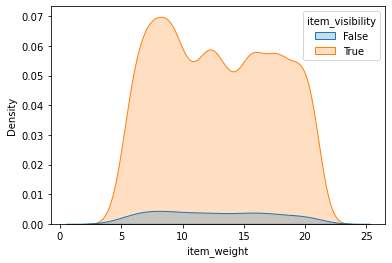

In [21]:
sns.kdeplot(df["item_weight"], hue=df["item_visibility"].gt(0), shade=True)

In [22]:
visibility_df = df[["item_identifier", "item_type", "outlet_identifier", "item_visibility"]].copy()
visibility_df["is_visible"] = df["item_visibility"].gt(0)
visibility_df.groupby("outlet_identifier")["is_visible"].mean().sort_values()

outlet_identifier
OUT018    0.929957
OUT046    0.934409
OUT027    0.935829
OUT013    0.936695
OUT045    0.937567
OUT017    0.938445
OUT035    0.941935
OUT049    0.943011
OUT019    0.943182
OUT010    0.947748
Name: is_visible, dtype: float64

In [23]:
visibility_df.groupby("item_identifier")["is_visible"].mean().sort_values()

item_identifier
FDY07    0.428571
FDU43    0.500000
NCD07    0.500000
FDZ50    0.500000
FDU35    0.500000
           ...   
FDC11    1.000000
FDQ01    1.000000
FDP59    1.000000
FDC10    1.000000
FDQ08    1.000000
Name: is_visible, Length: 1559, dtype: float64

In [24]:
visibility_df.groupby("item_type")["is_visible"].mean().sort_values()

item_type
Starchy Foods            0.898649
Hard Drinks              0.920561
Soft Drinks              0.923596
Fruits and Vegetables    0.929383
Baking Goods             0.930556
Breads                   0.932271
Health and Hygiene       0.936538
Seafood                  0.937500
Frozen Foods             0.940421
Others                   0.940828
Snack Foods              0.943333
Household                0.943956
Dairy                    0.944282
Canned                   0.949153
Meat                     0.952941
Breakfast                0.972727
Name: is_visible, dtype: float64

In [25]:
df.query("item_identifier == 'FDY07'")["item_type"].unique()

array(['Fruits and Vegetables'], dtype=object)

Mean sales for visible items: 2178.5754445667235
Mean sales for visible items: 2222.5429281368824


<AxesSubplot:xlabel='item_outlet_sales', ylabel='Density'>

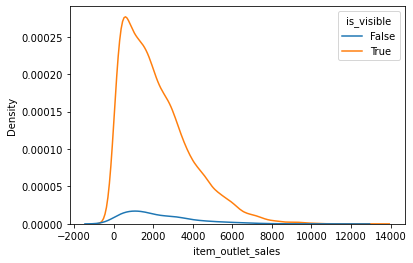

In [26]:
print("Mean sales for visible items: " + str(df.loc[visibility_df["is_visible"], "item_outlet_sales"].mean()))
print("Mean sales for visible items: " + str(df.loc[~visibility_df["is_visible"], "item_outlet_sales"].mean()))
sns.kdeplot(df["item_outlet_sales"], hue=visibility_df["is_visible"])

Each item has approximately the same visibility in each outlet

In [27]:
df.groupby("item_identifier")["item_visibility"].unique()

item_identifier
DRA12    [0.041177505, 0.0, 0.040911824, 0.041112694, 0...
DRA24    [0.040154087, 0.069909188, 0.066831682, 0.0397...
DRA59    [0.127927931, 0.128126825, 0.127821472, 0.0, 0...
DRB01              [0.082367244, 0.082170947, 0.081841136]
DRB13    [0.007084185, 0.007043008, 0.01179078, 0.00703...
                               ...                        
NCZ30    [0.043828293, 0.026163192, 0.026180032, 0.0, 0...
NCZ41    [0.064367627, 0.064409056, 0.064551885, 0.0647...
NCZ42    [0.0, 0.011351778, 0.011278535, 0.011285795, 0...
NCZ53    [0.024576875, 0.024358634, 0.024456797, 0.0409...
NCZ54    [0.0, 0.082955719, 0.083528446, 0.083359391, 0...
Name: item_visibility, Length: 1559, dtype: object

To impute visibility 0, replace 0 visibility with the average item visibility across all outlets

In [28]:
avg_item_visibility = df.groupby("item_identifier")["item_visibility"].unique().map(lambda item: item[item != 0].mean())
df["item_visibility"] = df.apply(lambda row: avg_item_visibility.loc[row["item_identifier"]] if row["item_visibility"] == 0 else row["item_visibility"], axis=1)
df.groupby("item_identifier")["item_visibility"].unique()

item_identifier
DRA12    [0.041177505, 0.0479342655, 0.040911824, 0.041...
DRA24    [0.040154087, 0.069909188, 0.066831682, 0.0397...
DRA59    [0.127927931, 0.128126825, 0.127821472, 0.1539...
DRB01              [0.082367244, 0.082170947, 0.081841136]
DRB13    [0.007084185, 0.007043008, 0.01179078, 0.00703...
                               ...                        
NCZ30    [0.043828293, 0.026163192, 0.026180032, 0.0291...
NCZ41    [0.064367627, 0.064409056, 0.064551885, 0.0647...
NCZ42    [0.01130539675, 0.011351778, 0.011278535, 0.01...
NCZ53    [0.024576875, 0.024358634, 0.024456797, 0.0409...
NCZ54    [0.09383050716666667, 0.082955719, 0.083528446...
Name: item_visibility, Length: 1559, dtype: object